In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('../data/combined_bbb_classification.csv')
df.head()

,name,smiles,BBB,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,sulphasalazine,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,0,12.341010,12.341010,0.023055,-3.794932,0.540588,11.428571,398.400,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,moxalactam,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,0,13.190522,13.190522,0.042537,-2.144257,0.133795,22.000000,520.480,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,clioquinol,Oc1c(I)cc(Cl)c2cccnc12,0,9.654043,9.654043,0.195000,0.195000,0.758308,10.615385,305.502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,bbcpd11 (cimetidine analog) (y-g13),CCNC(=NCCSCc1ncccc1Br)NC#N,0,8.544584,8.544584,0.532052,0.532052,0.272365,10.894737,342.266,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,schembl614298,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,0,11.445328,11.445328,0.165306,-1.798901,0.346256,45.303030,461.467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Preprocessing


In [3]:
# check for missing values
df.isna().sum()

name                 1109
smiles                  0
BBB                     0
MaxAbsEStateIndex      13
MaxEStateIndex         13
                     ... 
fr_thiazole            13
fr_thiocyan            13
fr_thiophene           13
fr_unbrch_alkane       13
fr_urea                13
Length: 220, dtype: int64

In [4]:
# checking 13 missing values in fr_urea column
df[df.fr_urea.isnull()]

,name,smiles,BBB,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
4933,mepenzolatebromide,C[N+]1(C)CCC[C@H](OC(=O)[C+](O)(c2ccccc2)c2ccc...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7627,tiotidine,C[N+]1(C)CCCC(OC(=O)[C+](O)(c2ccccc2)c2ccccc2)C1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7753,15,O=N([O-])C1=C(CN=C1NCCSCc2ncccc2)Cc3ccccc3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7755,22767,c1(nc(NC(N)=[NH2])sc1)CSCCNC(=[NH]C#N)NC,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8052,ICI17148,Cc1nc(sc1)\[NH]=C(\N)N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8230,5-6,s1cc(CSCCN\C(NC)=[NH]\C#N)nc1\[NH]=C(\N)N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8257,12,c1c(c(ncc1)CSCCN\C(=[NH]\C#N)NCC)Br,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8260,16,n1c(csc1\[NH]=C(\N)N)c1ccccc1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8261,17,n1c(csc1\[NH]=C(\N)N)c1cccc(c1)N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8262,18,n1c(csc1\[NH]=C(\N)N)c1cccc(c1)NC(C)=O,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# dropping these with missing values
df.dropna(subset=['fr_urea'], inplace=True)

In [6]:
# drop the name and smiles column as it is not needed for modeling
df.drop(columns=['name','smiles'], inplace=True)

# fill any remaining missing values with zero
df.fillna(0, inplace=True)

In [7]:
df.head()

,BBB,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,12.341010,12.341010,0.023055,-3.794932,0.540588,11.428571,398.400,384.288,398.068491,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,13.190522,13.190522,0.042537,-2.144257,0.133795,22.000000,520.480,500.320,520.101247,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,9.654043,9.654043,0.195000,0.195000,0.758308,10.615385,305.502,300.462,304.910439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,8.544584,8.544584,0.532052,0.532052,0.272365,10.894737,342.266,326.138,341.030979,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,11.445328,11.445328,0.165306,-1.798901,0.346256,45.303030,461.467,434.251,461.168581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Standardizing data

In [8]:
from sklearn.preprocessing import StandardScaler

# Standardizing data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('BBB', axis=1))
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[1:])  # Exclude the target column 'BBB'
scaled_df['BBB'] = df['BBB'].values

In [9]:
scaled_df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,BBB
0,0.250015,0.250034,-0.571809,-2.157358,-0.221684,-1.081406,0.103693,0.181675,0.104283,-0.022282,...,5.173161,-0.141653,-0.094397,-0.118378,-0.176261,0.0,-0.129887,-0.142629,-0.183929,0
1,0.523433,0.523449,-0.502652,-0.871079,-2.041236,-0.247425,0.839054,0.930083,0.839923,0.720790,...,-0.161298,-0.141653,-0.094397,8.447538,-0.176261,0.0,-0.129887,-0.142629,-0.183929,0
2,-0.614792,-0.614766,0.038556,0.951774,0.752159,-1.145558,-0.455888,-0.359004,-0.457294,-1.198811,...,-0.161298,-0.141653,-0.094397,-0.118378,-0.176261,0.0,-0.129887,-0.142629,-0.183929,0
3,-0.971875,-0.971845,1.235018,1.214421,-1.421426,-1.123520,-0.234436,-0.193394,-0.239552,-0.641508,...,-0.161298,-0.141653,-0.094397,-0.118378,-0.176261,0.0,-0.129887,-0.142629,-0.183929,0
4,-0.038263,-0.038241,-0.066849,-0.601962,-1.090916,1.590951,0.483583,0.503937,0.484664,0.535022,...,-0.161298,-0.141653,-0.094397,-0.118378,-0.176261,0.0,-0.129887,-0.142629,-0.183929,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9619,-0.147463,-0.147441,-0.519876,0.019848,-0.554977,-1.138419,-0.633386,-0.536063,-0.637902,-0.858237,...,-0.161298,-0.141653,-0.094397,-0.118378,-0.176261,0.0,-0.129887,-0.142629,-0.183929,1
9620,-0.278757,-0.278733,0.094755,-0.201012,-1.096669,0.202540,0.103964,0.129952,0.104697,0.070602,...,-0.161298,-0.141653,-0.094397,-0.118378,-0.176261,0.0,-0.129887,-0.142629,-0.183929,1
9621,0.100731,0.100751,-0.317458,0.410353,0.427956,-1.059335,-0.354294,-0.334739,-0.353413,-0.331895,...,-0.161298,-0.141653,-0.094397,-0.118378,-0.176261,0.0,-0.129887,-0.142629,5.147803,1
9622,-0.894903,-0.894873,1.534880,1.280246,-0.008154,-1.132121,0.007676,0.000842,0.008560,0.070602,...,-0.161298,-0.141653,-0.094397,-0.118378,-0.176261,0.0,-0.129887,-0.142629,-0.183929,1


In [10]:
# check BBB class distribution
scaled_df['BBB'].value_counts()

BBB
1    6358
0    3266
Name: count, dtype: int64

C:\Users\Mr_Nnobody\AppData\Local\Temp\ipykernel_12032\3923762219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BBB', data=scaled_df, palette='Set1')


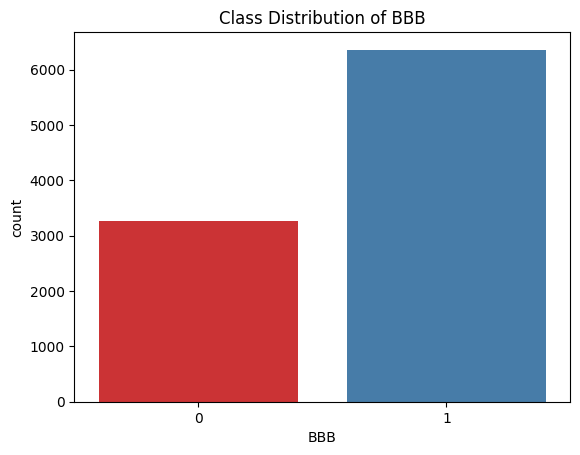

In [11]:
# plot class imbalance
sns.countplot(x='BBB', data=scaled_df, palette='Set1')
plt.title('Class Distribution of BBB')
plt.savefig('../figures/model_plots/bbb_class_distribution.png')

In [12]:
# perform BBB class balancing using SMOTE

from imblearn.over_sampling import SMOTE
X = scaled_df.drop('BBB', axis=1)
y = scaled_df['BBB']
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['BBB'] = y_res.values
balanced_df['BBB'].value_counts()


C:\Users\Mr_Nnobody\AppData\Local\Temp\ipykernel_12032\2509983473.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  balanced_df['BBB'] = y_res.values


BBB
0    6358
1    6358
Name: count, dtype: int64

C:\Users\Mr_Nnobody\AppData\Local\Temp\ipykernel_12032\1287355065.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BBB', data=balanced_df, palette='Set1')


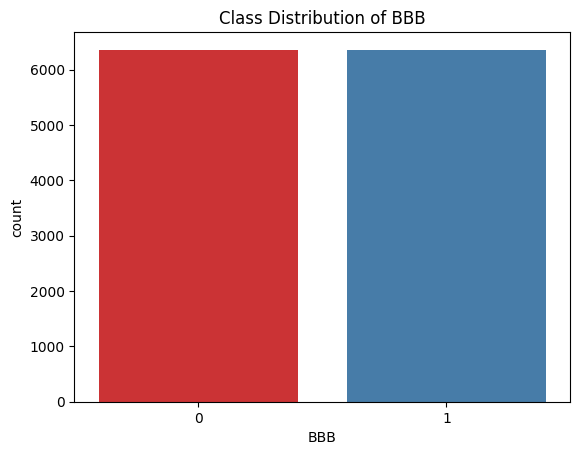

In [13]:
sns.countplot(x='BBB', data=balanced_df, palette='Set1')
plt.title('Class Distribution of BBB')
plt.savefig('../figures/model_plots/bbb_class_distribution_balanced.png')

# Build Model

In [14]:
from sklearn.model_selection import train_test_split

# splitting data into train and test data
# scaled_train_df, scaled_test_df = train_test_split(scaled_df, test_size=0.2, random_state=42)
balanced_train_df, balanced_test_df = train_test_split(balanced_df, test_size=0.2, random_state=42)



### Using Lazy Predict to help identify potential high performant models

In [15]:
from lazypredict.Supervised import LazyClassifier

def run_lazy_classifier(data):
    # Splitting data into features and target variable
    X = data.drop(columns='BBB')
    y = data['BBB']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)

    print(models)

In [16]:
# run lazy classifier on balanced data
run_lazy_classifier(balanced_train_df)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 3558, number of negative: 3562
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31181
[LightGBM] [Info] Number of data points in the train set: 7120, number of used features: 202
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499719 -> initscore=-0.001124
[LightGBM] [Info] Start training from score -0.001124
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.93               0.93     0.93      0.93   
ExtraTreesClassifier               0.93               0.93     0.93      0.93   
XGBClassifier                      0.93               0.93     0.93      0.93   
RandomForestClassifier             0.93               0.93     0.93      0.93   
BaggingClassifier    

### QSAR Models

In [17]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, matthews_corrcoef, average_precision_score
import joblib

results = []
conf_matrices = []
saved_models = {}

In [18]:

# Define the models
def build_models(data):
    X = data.drop(columns='BBB')
    y = data['BBB']

    models = [
        ('KNN', KNeighborsClassifier(n_neighbors=3)),
        ('SVM', SVC(probability=True)),
        ('RF', RandomForestClassifier(max_depth=8, n_estimators=100)),
        ('LR', LogisticRegression(max_iter=1000)),
    ]


    # using stratified kfold
    from sklearn.model_selection import StratifiedKFold
    fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


    # Perform cross-validation on each model
    for name, model in models:
        # Get cross-validated predictions
        print('Performing cross validation on ',name)
        y_pred = cross_val_predict(model, X, y, cv=fold)
        
        # Get probability predictions
        y_proba = cross_val_predict(model, X, y, cv=fold, method='predict_proba')
        
        # Compute the confusion matrix
        cm = confusion_matrix(y, y_pred)
        
        # Extract confusion matrix values
        TN, FP, FN, TP = cm.ravel()
        
        # Calculate metrics
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        
        # Save results
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'Specificity': specificity,
            'F1 Score': f1,
            'roc_auc': roc_auc_score(y, y_proba[:, 1]) if y_proba is not None else None,
            'pr_auc': average_precision_score(y, y_proba[:, 1]) if y_proba is not None else None,
            'mcc': matthews_corrcoef(y, y_pred)
        })
        
        # Store confusion matrix
        conf_matrices.append(cm)
        
        # Fitting models
        print('Fitting ', name)
        model.fit(X, y)
        
        # Save models for future prediction
        saved_models[name] = model
        print(f'... Successfully saved {name} model.')
            

In [19]:
# build models on balanced data
build_models(balanced_train_df)

Performing cross validation on  KNN
Fitting  KNN
... Successfully saved KNN model.
Performing cross validation on  SVM
Fitting  SVM
... Successfully saved SVM model.
Performing cross validation on  RF
Fitting  RF
... Successfully saved RF model.
Performing cross validation on  LR
Fitting  LR
... Successfully saved LR model.


In [20]:
# train xgboost model since its not compatible with sklearn's cross_val_predict
def train_xgboost(data):
	X = data.drop(columns='BBB')
	y = data['BBB']
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
	
	model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
	model.fit(X_train, y_train)
	y_pred = model.predict(X_test)
	y_proba = model.predict_proba(X_test)

	# Calculate additional metrics for XGBoost
	from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
	accuracy_xgb = accuracy_score(y_test, y_pred)
	precision_xgb = precision_score(y_test, y_pred)
	recall_xgb = recall_score(y_test, y_pred)
	f1_xgb = f1_score(y_test, y_pred)
	roc_auc_xgb = roc_auc_score(y_test, y_proba[:, 1])
	pr_auc_xgb = average_precision_score(y_test, y_proba[:, 1])
	mcc_xgb = matthews_corrcoef(y_test, y_pred)

	# Calculate specificity
	cm_xgb = confusion_matrix(y_test, y_pred)
	TN, FP, FN, TP = cm_xgb.ravel()
	specificity_xgb = TN / (TN + FP) if (TN + FP) != 0 else 0

	results.append({
		'Model': 'XGB',
		'Accuracy': accuracy_xgb,
		'Precision': precision_xgb,
		'Recall': recall_xgb,
		'Specificity': specificity_xgb,
		'F1 Score': f1_xgb,
		'roc_auc': roc_auc_xgb,
		'pr_auc': pr_auc_xgb,
		'mcc': mcc_xgb
	})

	# Save the XGBoost model
	saved_models['XGB'] = model
	print('... Successfully saved XGB model.')


In [21]:
#train xgboost on balanced data
train_xgboost(balanced_train_df)

... Successfully saved XGB model.


In [22]:
# Create a results DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,roc_auc,pr_auc,mcc
0,KNN,0.92,0.93,0.90,0.93,0.92,0.96,0.95,0.83
1,SVM,0.89,0.89,0.89,0.89,0.89,0.95,0.96,0.79
2,RF,0.89,0.86,0.93,0.85,0.89,0.96,0.96,0.78
3,LR,0.84,0.83,0.87,0.82,0.85,0.92,0.92,0.69
4,XGB,0.93,0.94,0.93,0.94,0.93,0.98,0.98,0.87


In [23]:
# Save each model
# for name, model in saved_models.items():
#     joblib.dump(model, f'../models/{name}_model.pkl')
# # Save the scaler used during training
# joblib.dump(scaler, '../output/models/scaler.pkl')

### Deep Learning Models

In [24]:
# Build a Multilayer Perceptron (MLP) for classification

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# Use your balanced and scaled data
X = balanced_train_df.drop('BBB', axis=1).values
y = balanced_train_df['BBB'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP model with Dropout and L2 Regularization
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with the callback
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate on test set (will use the best weights because of restore_best_weights=True)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7336 - loss: 0.6877 - val_accuracy: 0.8403 - val_loss: 0.4808
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8276 - loss: 0.5054 - val_accuracy: 0.8544 - val_loss: 0.4430
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8475 - loss: 0.4554 - val_accuracy: 0.8729 - val_loss: 0.4118
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8610 - loss: 0.4294 - val_accuracy: 0.8673 - val_loss: 0.3986
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8731 - loss: 0.3983 - val_accuracy: 0.8729 - val_loss: 0.3847
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8799 - loss: 0.3708 - val_accuracy: 0.8692 - val_loss: 0.3814
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8863 - loss: 0.3666 - val_accuracy: 0.8796 - val_loss: 0.3614
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8960 - loss: 0.3436 - val_accu

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions for the test set
y_proba_mlp = model.predict(X_test)
y_pred_mlp = (y_proba_mlp > 0.5).astype("int32")

# Calculate additional metrics
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_proba_mlp)
pr_auc_mlp = average_precision_score(y_test, y_proba_mlp)
mcc_mlp = matthews_corrcoef(y_test, y_pred_mlp)

# Calculate specificity from confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
TN, FP, FN, TP = cm_mlp.ravel()
specificity_mlp = TN / (TN + FP) if (TN + FP) != 0 else 0

# Append results to the list
results.append({
    'Model': 'MLP',
    'Accuracy': test_acc,
    'Precision': precision_mlp,
    'Recall': recall_mlp,
    'Specificity': specificity_mlp,
    'F1 Score': f1_mlp,
    'roc_auc': roc_auc_mlp,
    'pr_auc': pr_auc_mlp,
    'mcc': mcc_mlp
})

# Save the MLP model
# model.save('../models/MLP_model.h5')
# print('... Successfully saved MLP model.')

# Re-create and display the results DataFrame
results_df = pd.DataFrame(results)
results_df

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Model,Accuracy,Precision,Recall,Specificity,F1 Score,roc_auc,pr_auc,mcc
0,KNN,0.92,0.93,0.90,0.93,0.92,0.96,0.95,0.83
1,SVM,0.89,0.89,0.89,0.89,0.89,0.95,0.96,0.79
2,RF,0.89,0.86,0.93,0.85,0.89,0.96,0.96,0.78
3,LR,0.84,0.83,0.87,0.82,0.85,0.92,0.92,0.69
4,XGB,0.93,0.94,0.93,0.94,0.93,0.98,0.98,0.87
5,MLP,0.91,0.94,0.88,0.94,0.91,0.96,0.97,0.82


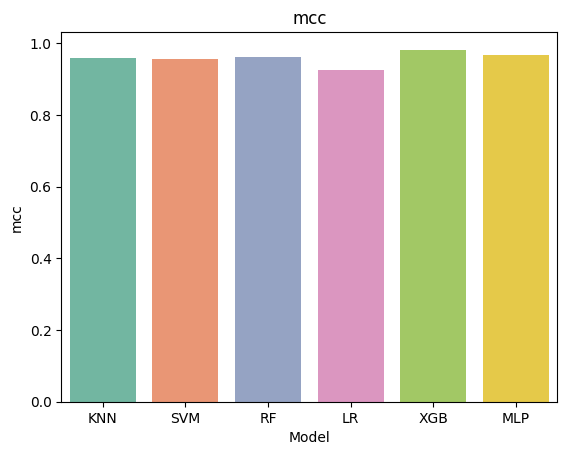

In [26]:
# plot individual metrics and save
metrics = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score', 'roc_auc', 'pr_auc', 'mcc']
for metric in metrics:
    sns.barplot(x='Model', y=metric, data=results_df, palette= 'Set2')
    plt.title(metric)
    plt.ylabel(metric)
    plt.xlabel('Model')
    # save plot
    # plt.savefig(f'../figures/model_plots/{metric}_comparison.png')

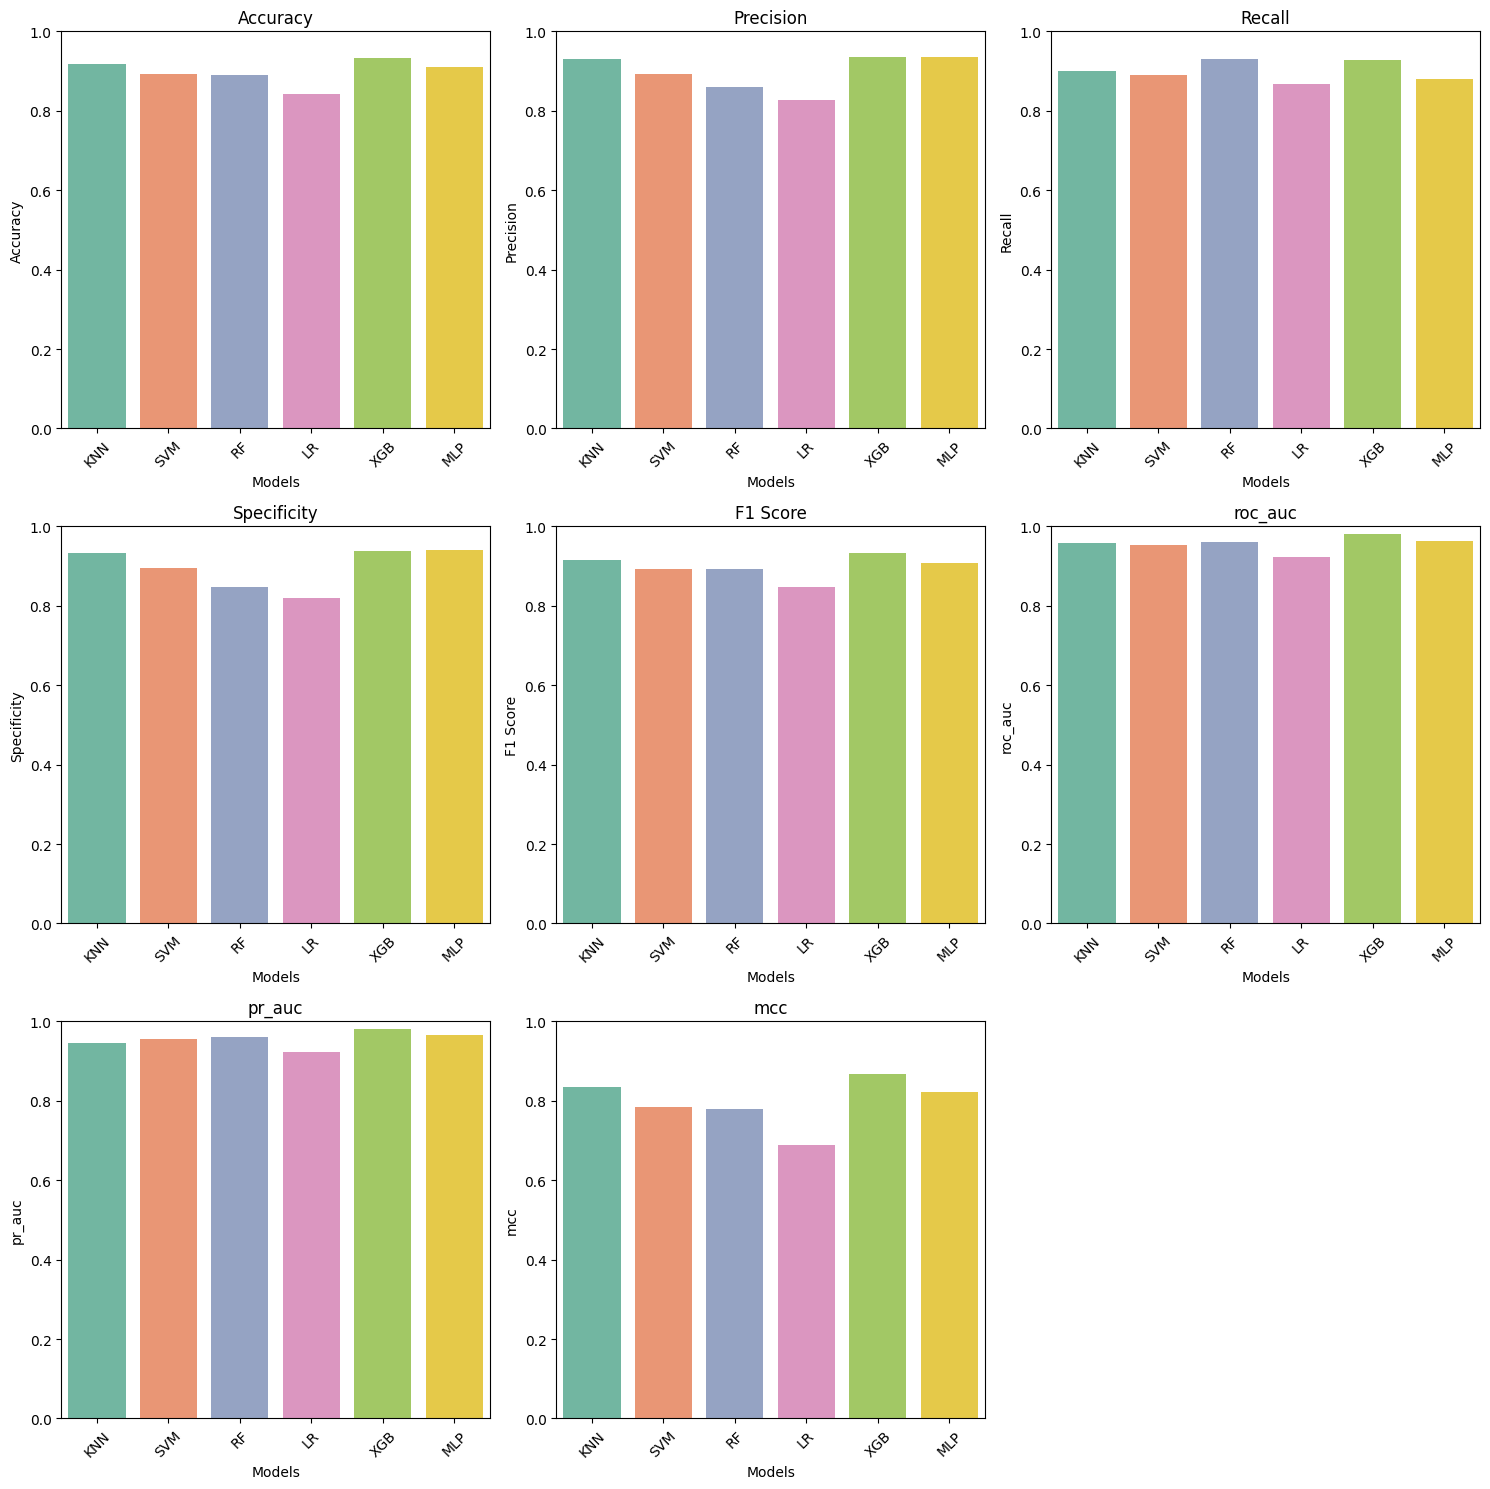

In [27]:
# plot all metrics in a single figure
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=results_df, palette='Set2', ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(metric)
    axs[i//3, i%3].set_ylim(0, 1) 
    axs[i//3, i%3].set_ylabel(metric)
    axs[i//3, i%3].set_xlabel('Models')
    axs[i//3, i%3].tick_params(axis='x', rotation=45)
   
# Remove the empty subplot
fig.delaxes(axs[2, 2])

#save each plot
# plt.savefig("../figures/model_plots/model_comparism.png")
plt.tight_layout()
plt.show()

### Evaluating Saved models on test data

In [28]:
# evaluate saved models on test data
model_names = ['KNN', 'SVM', 'RF', 'LR', 'XGB']
loaded_models = {name: joblib.load(f'../output/models/{name}_model.pkl') for name in model_names }
MLP_model = tf.keras.models.load_model('../output/models/MLP_model.h5')

# Prepare test datat
X_test = balanced_test_df.drop('BBB', axis=1).values
y_test = balanced_test_df['BBB'].values

eval_results = []
predictions = pd.DataFrame()

# Evaluate traditional ML models
from sklearn.metrics import accuracy_score
for name, model in loaded_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

    eval_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Specificity': specificity,
        'F1 Score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba[:, 1]),
        'pr_auc': average_precision_score(y_test, y_proba[:, 1]),
        'mcc': matthews_corrcoef(y_test, y_pred)
    })
    
    predictions[name] = y_pred
    predictions[f'{name}_proba'] = y_proba[:, 1]

# Evaluate MLP model
y_proba_mlp = MLP_model.predict(X_test)
y_pred_mlp = (y_proba_mlp > 0.5).astype("int32")

# Calculate metrics for MLP
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
TN, FP, FN, TP = cm_mlp.ravel()
specificity_mlp = TN / (TN + FP) if (TN + FP) != 0 else 0

eval_results.append({
    'Model': 'MLP',
    'Accuracy': accuracy_score(y_test, y_pred_mlp),
    'Precision': precision_score(y_test, y_pred_mlp),
    'Recall': recall_score(y_test, y_pred_mlp),
    'Specificity': specificity_mlp,
    'F1 Score': f1_score(y_test, y_pred_mlp),
    'roc_auc': roc_auc_score(y_test, y_proba_mlp),
    'pr_auc': average_precision_score(y_test, y_proba_mlp),
    'mcc': matthews_corrcoef(y_test, y_pred_mlp)
})

predictions['MLP'] = y_pred_mlp.flatten()
predictions['MLP_proba'] = y_proba_mlp.flatten()


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [29]:
eval_df = pd.DataFrame(eval_results)
eval_df

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,roc_auc,pr_auc,mcc
0,KNN,0.92,0.94,0.89,0.94,0.91,0.95,0.94,0.83
1,SVM,0.90,0.90,0.89,0.90,0.90,0.95,0.96,0.79
2,RF,0.89,0.86,0.93,0.85,0.89,0.95,0.95,0.78
3,LR,0.84,0.83,0.86,0.82,0.84,0.92,0.92,0.68
4,XGB,0.91,0.91,0.92,0.91,0.91,0.97,0.97,0.83
5,MLP,0.90,0.93,0.86,0.93,0.89,0.96,0.96,0.79


### Feature Importance Analysis


Calculating feature importance for RF...
Using built-in feature importance for RF


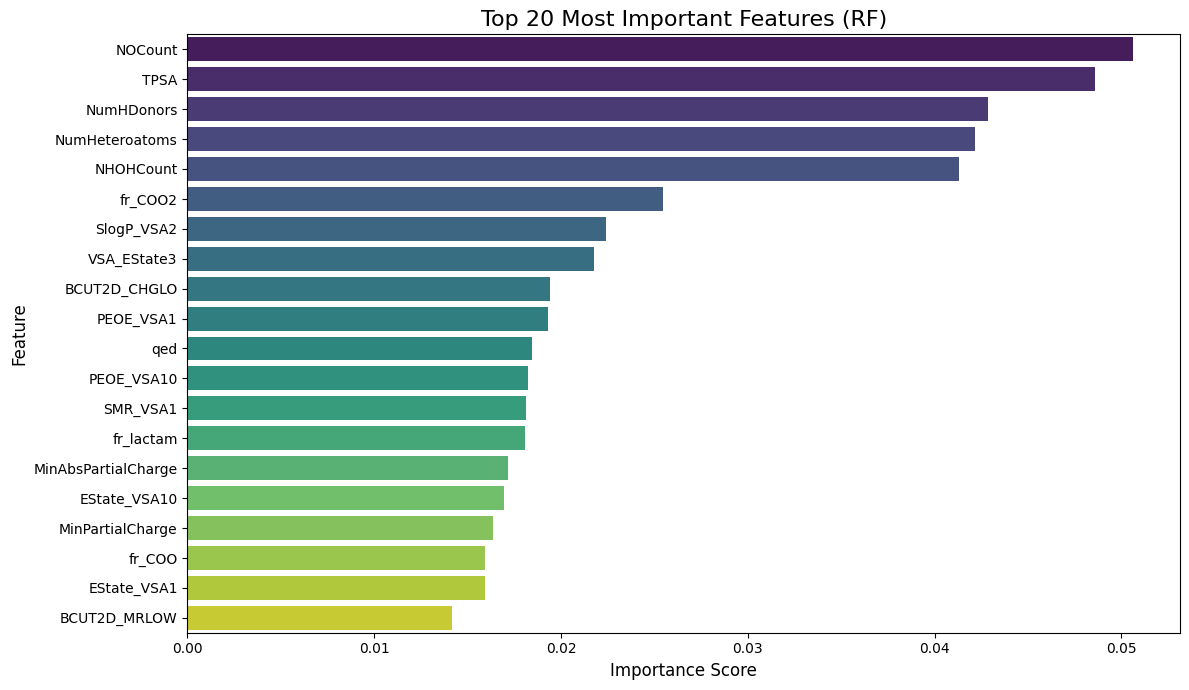


RF Top 20 Features:
                 Feature  Importance
108              NOCount        0.05
83                  TPSA        0.05
119           NumHDonors        0.04
120       NumHeteroatoms        0.04
107            NHOHCount        0.04
141              fr_COO2        0.03
75            SlogP_VSA2        0.02
98           VSA_EState3        0.02
21          BCUT2D_CHGLO        0.02
47             PEOE_VSA1        0.02
4                    qed        0.02
48            PEOE_VSA10        0.02
61              SMR_VSA1        0.02
185            fr_lactam        0.02
14   MinAbsPartialCharge        0.02
85          EState_VSA10        0.02
12      MinPartialCharge        0.02
140               fr_COO        0.02
84           EState_VSA1        0.02
25          BCUT2D_MRLOW        0.01

Calculating feature importance for XGB...
Using built-in feature importance for XGB


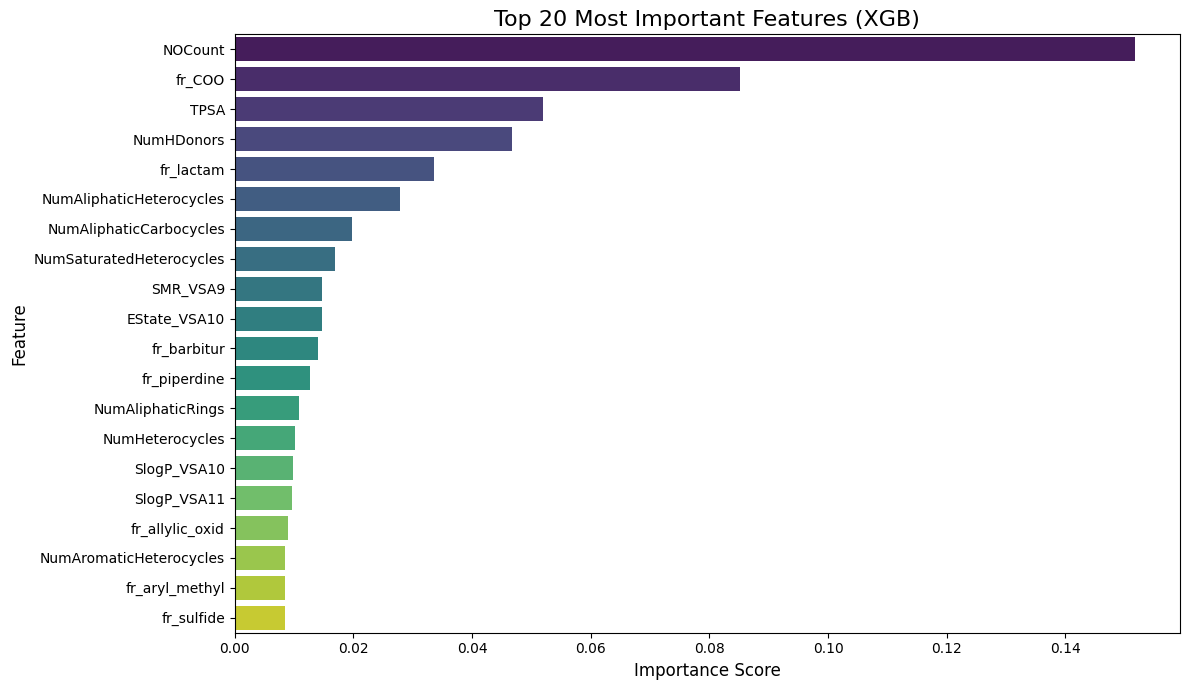


XGB Top 20 Features:
                      Feature  Importance
108                   NOCount        0.15
140                    fr_COO        0.09
83                       TPSA        0.05
119                NumHDonors        0.05
185                 fr_lactam        0.03
110  NumAliphaticHeterocycles        0.03
109   NumAliphaticCarbocycles        0.02
124  NumSaturatedHeterocycles        0.02
70                   SMR_VSA9        0.01
85               EState_VSA10        0.01
165               fr_barbitur        0.01
201              fr_piperdine        0.01
111         NumAliphaticRings        0.01
121           NumHeterocycles        0.01
72                SlogP_VSA10        0.01
73                SlogP_VSA11        0.01
158           fr_allylic_oxid        0.01
114   NumAromaticHeterocycles        0.01
162            fr_aryl_methyl        0.01
207                fr_sulfide        0.01

Calculating feature importance for LR...
Using coefficient magnitudes for LR


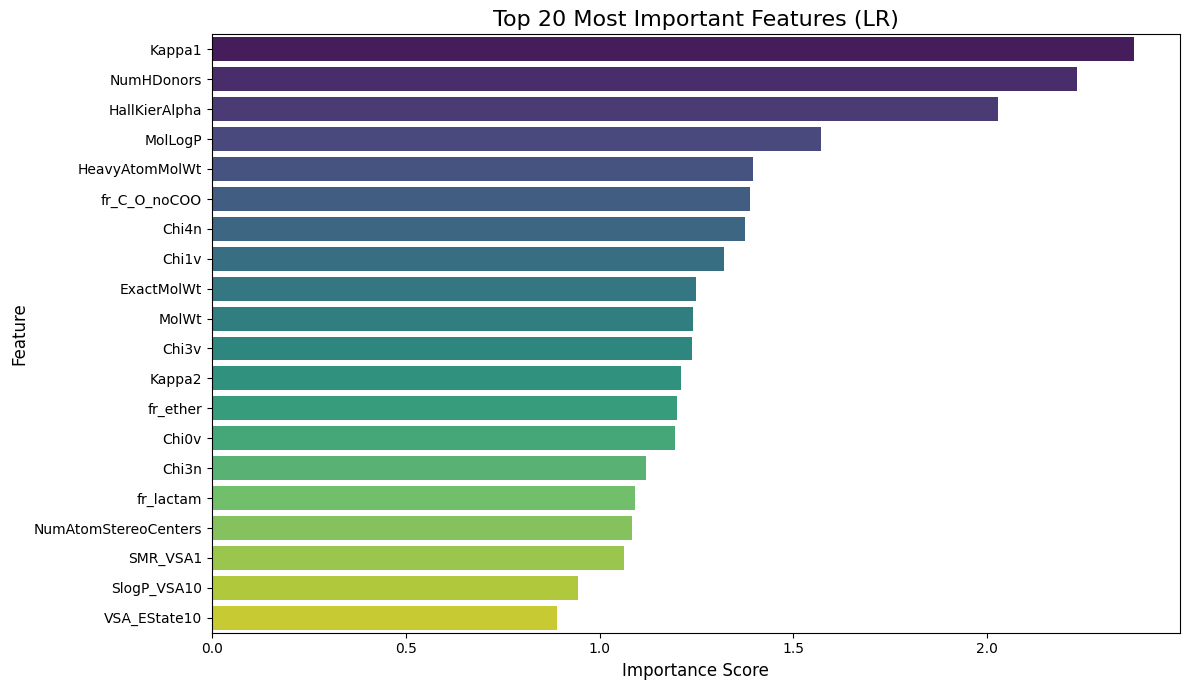


LR Top 20 Features:
                  Feature  Importance
43                 Kappa1        2.38
119            NumHDonors        2.23
41          HallKierAlpha        2.03
130               MolLogP        1.57
7          HeavyAtomMolWt        1.40
143          fr_C_O_noCOO        1.39
39                  Chi4n        1.38
34                  Chi1v        1.32
8              ExactMolWt        1.25
6                   MolWt        1.24
38                  Chi3v        1.24
44                 Kappa2        1.21
173              fr_ether        1.20
31                  Chi0v        1.19
37                  Chi3n        1.12
185             fr_lactam        1.09
116  NumAtomStereoCenters        1.08
61               SMR_VSA1        1.06
72            SlogP_VSA10        0.94
96           VSA_EState10        0.89

Calculating feature importance for KNN...
Using permutation importance on sample data for KNN (this may take a minute...)


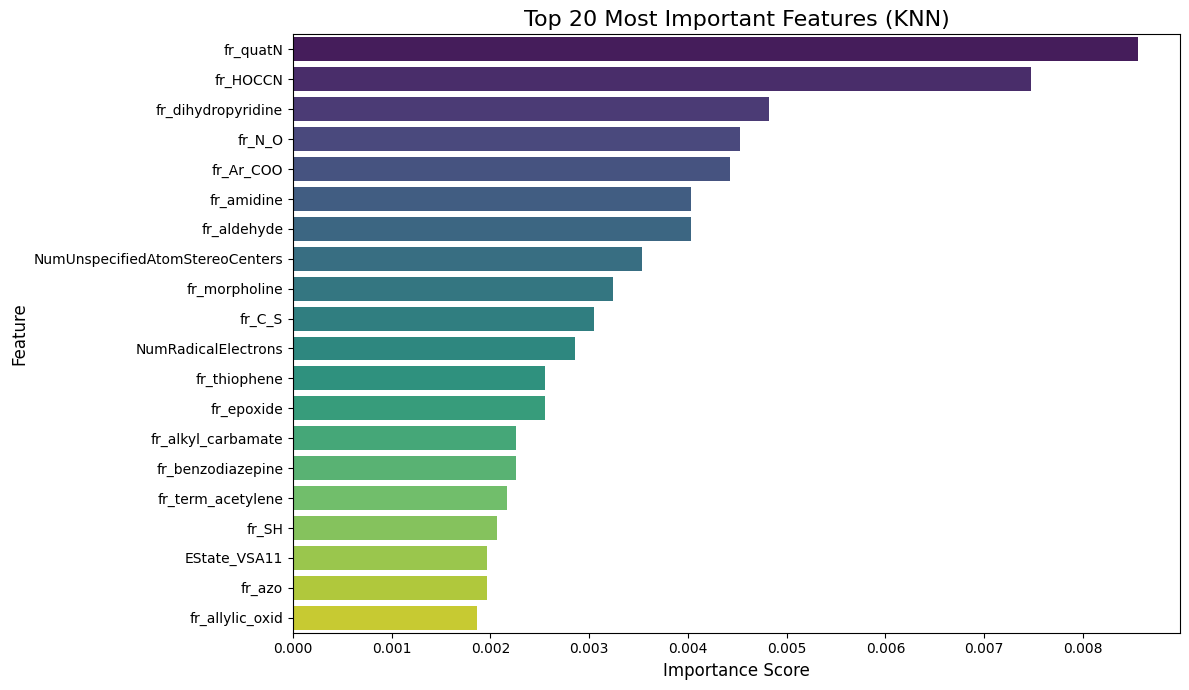


KNN Top 20 Features:
                             Feature  Importance
206                         fr_quatN        0.01
145                         fr_HOCCN        0.01
170               fr_dihydropyridine        0.00
150                           fr_N_O        0.00
136                        fr_Ar_COO        0.00
160                       fr_amidine        0.00
155                      fr_aldehyde        0.00
127  NumUnspecifiedAtomStereoCenters        0.00
188                    fr_morpholine        0.00
144                           fr_C_S        0.00
10               NumRadicalElectrons        0.00
214                     fr_thiophene        0.00
171                       fr_epoxide        0.00
156               fr_alkyl_carbamate        0.00
167                fr_benzodiazepine        0.00
210                fr_term_acetylene        0.00
154                            fr_SH        0.00
86                      EState_VSA11        0.00
164                           fr_azo        0.0

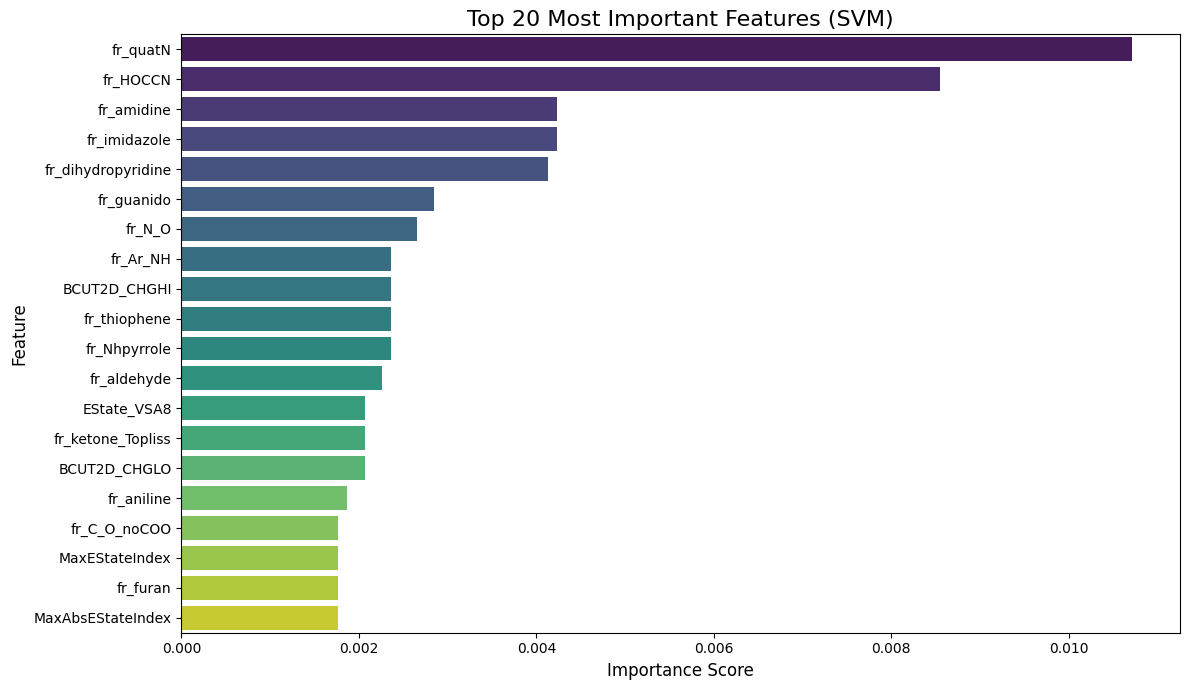


SVM Top 20 Features:
                Feature  Importance
206            fr_quatN        0.01
145            fr_HOCCN        0.01
160          fr_amidine        0.00
179        fr_imidazole        0.00
170  fr_dihydropyridine        0.00
175          fr_guanido        0.00
150              fr_N_O        0.00
138            fr_Ar_NH        0.00
20         BCUT2D_CHGHI        0.00
214        fr_thiophene        0.00
153        fr_Nhpyrrole        0.00
155         fr_aldehyde        0.00
93          EState_VSA8        0.00
184   fr_ketone_Topliss        0.00
21         BCUT2D_CHGLO        0.00
161          fr_aniline        0.00
143        fr_C_O_noCOO        0.00
1        MaxEStateIndex        0.00
174            fr_furan        0.00
0     MaxAbsEStateIndex        0.00


In [30]:
# Feature Importance from models
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Get the feature names from your training data
feature_names = balanced_train_df.drop('BBB', axis=1).columns

X_train = balanced_train_df.drop('BBB', axis=1)
y_train = balanced_train_df['BBB']

# Use a SMALLER sample for permutation importance to speed things up
from sklearn.model_selection import train_test_split
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42, stratify=y_train)

# Analyze feature importance for different model types
top_models = ['RF', 'XGB', 'LR','KNN', 'SVM']  # Removed SVM (too slow)
loaded_models = {name: joblib.load(f'../output/models/{name}_model.pkl') for name in top_models}

for name, model in loaded_models.items():
    print(f"\nCalculating feature importance for {name}...")
    
    if hasattr(model, 'feature_importances_'):
        # For tree-based models (RF, XGB) - FAST
        print(f"Using built-in feature importance for {name}")
        importances = model.feature_importances_
        
    elif hasattr(model, 'coef_'):
        # For linear models (LR) - Use coefficients (FAST)
        print(f"Using coefficient magnitudes for {name}")
        importances = np.abs(model.coef_[0])
        
    else:
        # For other models (KNN, SVM) - Use permutation importance on SAMPLE
        print(f"Using permutation importance on sample data for {name} (this may take a minute...)")
        perm_importance = permutation_importance(
            model, X_sample, y_sample, 
            n_repeats=5,  # Reduced from 10
            random_state=42,
            n_jobs=-1  # Use all CPU cores
        )
        importances = perm_importance.importances_mean

    # Create a DataFrame for feature importances
    ft_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(20)

    # Plotting the ranked bar chart
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Importance', y='Feature', data=ft_importance_df, palette='viridis')
    plt.title(f'Top 20 Most Important Features ({name})', fontsize=16)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.savefig(f'../figures/{name}_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n{name} Top 20 Features:")
    print(ft_importance_df)


Calculating feature importance for MLP (this may take a few minutes)...
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


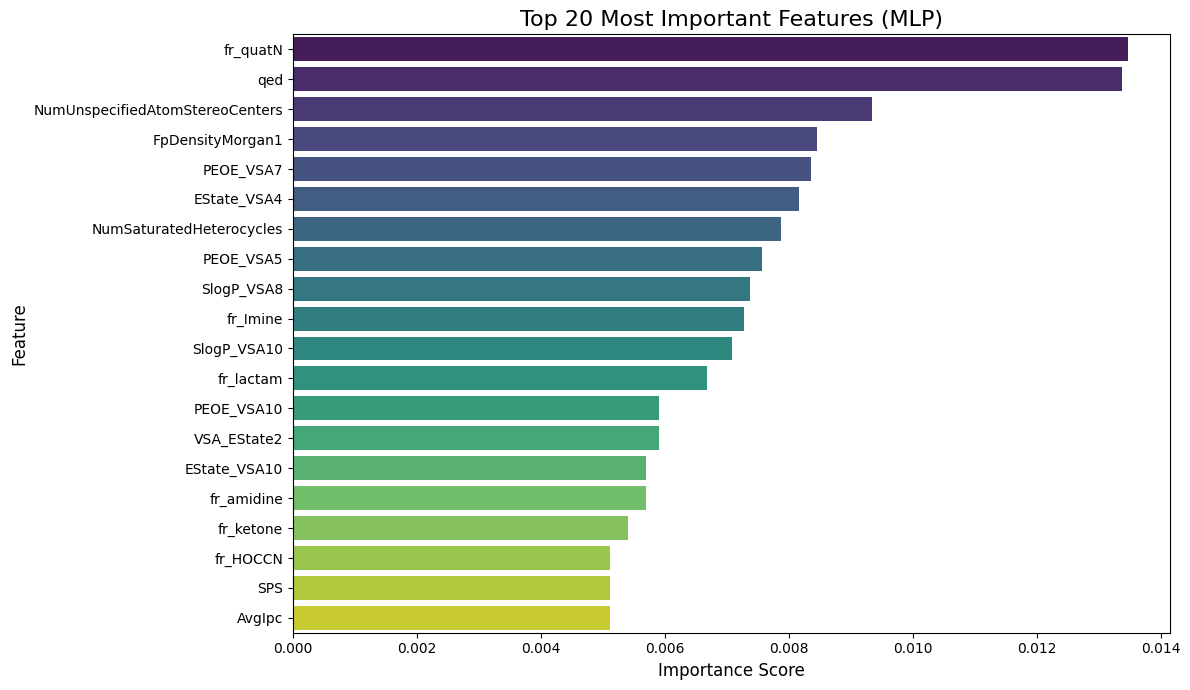


MLP Top 20 Features:
                             Feature  Importance
206                         fr_quatN        0.01
4                                qed        0.01
127  NumUnspecifiedAtomStereoCenters        0.01
15                  FpDensityMorgan1        0.01
58                         PEOE_VSA7        0.01
89                       EState_VSA4        0.01
124         NumSaturatedHeterocycles        0.01
56                         PEOE_VSA5        0.01
81                        SlogP_VSA8        0.01
146                         fr_Imine        0.01
72                       SlogP_VSA10        0.01
185                        fr_lactam        0.01
48                        PEOE_VSA10        0.01
97                       VSA_EState2        0.01
85                      EState_VSA10        0.01
160                       fr_amidine        0.01
183                        fr_ketone        0.01
145                         fr_HOCCN        0.01
5                                SPS        0.0

In [31]:
#cMLP Feature Importance using Permutation Importance
print("\nCalculating feature importance for MLP (this may take a few minutes)...")

# Wrap the Keras model so that .predict returns class labels (0 or 1)
class KerasClassifierWrapper:
    def __init__(self, model):
        self.model = model
    def fit(self, X, y):
        # Dummy fit method to satisfy sklearn interface
        return self
    def predict(self, X):
        proba = self.model.predict(X)
        return (proba > 0.5).astype("int32").flatten()

wrapped_mlp = KerasClassifierWrapper(MLP_model)

# Use sample data for speed
perm_importance_mlp = permutation_importance(
    wrapped_mlp, X_sample, y_sample,
    n_repeats=5,
    random_state=42,
    n_jobs=-1,
    scoring="accuracy"  # Specify scoring since Keras model lacks .score()
)
importances_mlp = perm_importance_mlp.importances_mean

# Create DataFrame
ft_importance_df_mlp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_mlp
}).sort_values(by='Importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=ft_importance_df_mlp, palette='viridis')
plt.title('Top 20 Most Important Features (MLP)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('../figures/MLP_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nMLP Top 20 Features:")
print(ft_importance_df_mlp)

In [32]:
predictions['BBB'] = y_test
predictions

,KNN,KNN_proba,SVM,SVM_proba,RF,RF_proba,LR,LR_proba,XGB,XGB_proba,MLP,MLP_proba,BBB
0,1,1.00,1,0.97,1,0.88,1,0.93,1,1.00,1,0.99,1
1,1,1.00,1,0.97,1,0.89,1,0.88,1,1.00,1,0.99,1
2,1,1.00,1,0.99,1,0.89,1,0.89,1,1.00,1,1.00,1
3,0,0.33,0,0.05,0,0.13,0,0.09,0,0.03,0,0.09,0
4,0,0.00,0,0.05,0,0.03,0,0.03,0,0.00,0,0.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,0,0.00,1,0.68,1,0.52,0,0.49,0,0.44,0,0.33,0
2540,1,1.00,1,0.96,1,0.93,1,0.80,1,1.00,1,0.99,1
2541,1,1.00,1,0.99,1,0.93,1,0.93,1,1.00,1,1.00,1
2542,0,0.33,0,0.40,1,0.74,0,0.30,1,0.91,0,0.46,0


In [33]:
# count how many BBB positive cases are correctly predicted by each model
cnt_BBB = 0
cnt = {}
models = ['KNN', 'SVM', 'RF', 'LR', 'XGB', 'MLP']
for i in range(len(predictions['BBB'])):
    if predictions['BBB'][i] == 1:
        cnt_BBB +=1 
        for model in models:
            if predictions[model][i] == 1:
                if model not in cnt:
                    cnt[model] = 1
                else:
                    cnt[model] += 1
print(f'Total BBB positive cases in test set: {cnt_BBB}')
print(cnt)

Total BBB positive cases in test set: 1274
{'KNN': 1137, 'SVM': 1139, 'RF': 1183, 'LR': 1098, 'XGB': 1172, 'MLP': 1094}


In [34]:
# count how many BBB negative cases are correctly predicted by each model
cnt_BBB = 0
cnt = {}
models = ['KNN', 'SVM', 'RF', 'LR', 'XGB', 'MLP']
for i in range(len(predictions['BBB'])):
    if predictions['BBB'][i] == 0:
        cnt_BBB +=1 
        for model in models:
            if predictions[model][i] == 0:
                if model not in cnt:
                    cnt[model] = 1
                else:
                    cnt[model] += 1
print(f'Total BBB negative cases in test set: {cnt_BBB}')
print(cnt)

Total BBB negative cases in test set: 1270
{'KNN': 1194, 'SVM': 1141, 'RF': 1076, 'LR': 1041, 'XGB': 1152, 'MLP': 1184}


## Optimizing models using OPTUNA

In [ ]:
# hyperparameter tuning with optuna
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import joblib

# Define the data for tuning ---
X_train = balanced_train_df.drop('BBB', axis=1)
y_train = balanced_train_df['BBB']
results1 =[]
# Define the objective function for Optuna
# This function takes a 'trial' object and returns a score for Optuna to maximize.
def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=50)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    # Create the Random Forest model with the suggested hyperparameters
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        criterion=criterion,
        random_state=42,
        n_jobs=-1  # Use all available CPU cores
    )

    # Evaluate the model using 5-fold cross-validation. We'll maximize the ROC AUC score.
    score = cross_val_score(rf_model, X_train, y_train, n_jobs=-1, cv=5, scoring='f1')
    mean_score = score.mean()
    
    return mean_score

# Create and run the Optuna study
# We want to maximize the roc_auc score, so the direction is 'maximize'.
study = optuna.create_study(direction='maximize')

# Start the optimization. n_trials can be increased for a more thorough search.
print("Starting hyperparameter tuning for Random Forest...")
study.optimize(objective, n_trials=50) # 50 trials is a good starting point

# Print and save the results
print("\nHyperparameter tuning finished.")
print(f"Best F1 Score: {study.best_value:.4f}")
print("Best hyperparameters found:")
for key, value in study.best_params.items():
    print(f"  - {key}: {value}")

# Retrain and save the best model
print("\nRetraining model with best hyperparameters...")
best_rf_model = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)
best_rf_model.fit(X_train, y_train)

# Save the optimized model
model_save_path = '../output/models/RF_tuned_model.pkl'
joblib.dump(best_rf_model, model_save_path)
print(f"Optimized Random Forest model saved to: {model_save_path}")

[I 2025-11-06 13:39:35,429] A new study created in memory with name: no-name-f88b1d87-067d-48eb-8a6e-0a0cdf191bc4


Starting hyperparameter tuning for Random Forest...


[I 2025-11-06 13:40:20,829] Trial 0 finished with value: 0.8967654938080354 and parameters: {'n_estimators': 500, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 17, 'max_features': 'sqrt', 'criterion': 'gini'}. Best is trial 0 with value: 0.8967654938080354.
[I 2025-11-06 13:41:22,745] Trial 1 finished with value: 0.8961035848715762 and parameters: {'n_estimators': 900, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 20, 'max_features': 'log2', 'criterion': 'entropy'}. Best is trial 0 with value: 0.8967654938080354.
[I 2025-11-06 13:41:56,354] Trial 2 finished with value: 0.9025151182942912 and parameters: {'n_estimators': 500, 'max_depth': 14, 'min_samples_split': 12, 'min_samples_leaf': 16, 'max_features': 'log2', 'criterion': 'entropy'}. Best is trial 2 with value: 0.9025151182942912.
[I 2025-11-06 13:42:15,997] Trial 3 finished with value: 0.9174728316997044 and parameters: {'n_estimators': 250, 'max_depth': 25, 'min_samples_split': 20, 'min_samples_leaf'

In [ ]:
# hyperparameter tuning of KNN model
from sklearn.neighbors import KNeighborsClassifier

# Define the objective function for KNN ---
def objective_knn(trial):
    # Define the hyperparameter search space
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])
    
    # Create the KNN model
    knn_model = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        metric=metric,
        n_jobs=-1
    )
    
    # Evaluate using cross-validation
    score = cross_val_score(knn_model, X_train, y_train, n_jobs=-1, cv=5, scoring='f1')
    mean_score = score.mean()
    
    return mean_score

# --- 3. Create and run the Optuna study for KNN ---
study_knn = optuna.create_study(direction='maximize')
print("Starting hyperparameter tuning for KNN...")
study_knn.optimize(objective_knn, n_trials=50)

# --- 4. Print and save the results for KNN ---
print("\nKNN tuning finished.")
print(f"Best F1 Score: {study_knn.best_value:.4f}")
print("Best hyperparameters found:")
for key, value in study_knn.best_params.items():
    print(f"  - {key}: {value}")

# --- 5. Retrain and save the best KNN model ---
print("\nRetraining KNN model with best hyperparameters...")
best_knn_model = KNeighborsClassifier(**study_knn.best_params, n_jobs=-1)
best_knn_model.fit(X_train, y_train)

# Save the optimized model
model_save_path_knn = '../output/models/KNN_tuned_model.pkl'
joblib.dump(best_knn_model, model_save_path_knn)
print(f"Optimized KNN model saved to: {model_save_path_knn}")

[I 2025-11-02 21:01:53,347] A new study created in memory with name: no-name-5be89f8e-3ec8-494b-894e-9efefdb20899


Starting hyperparameter tuning for KNN...


[I 2025-11-02 21:01:57,376] Trial 0 finished with value: 0.8561247559091363 and parameters: {'n_neighbors': 29, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.8561247559091363.
[I 2025-11-02 21:02:02,715] Trial 1 finished with value: 0.8598498952059492 and parameters: {'n_neighbors': 23, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 1 with value: 0.8598498952059492.
[I 2025-11-02 21:02:06,540] Trial 2 finished with value: 0.8593072501792332 and parameters: {'n_neighbors': 24, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 1 with value: 0.8598498952059492.
[I 2025-11-02 21:02:09,856] Trial 3 finished with value: 0.8991853764462474 and parameters: {'n_neighbors': 50, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 3 with value: 0.8991853764462474.
[I 2025-11-02 21:02:13,370] Trial 4 finished with value: 0.9179834277335305 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 4 w


KNN tuning finished.
Best F1 Score: 0.9324
Best hyperparameters found:
  - n_neighbors: 2
  - weights: distance
  - metric: minkowski

Retraining KNN model with best hyperparameters...
Optimized KNN model saved to: ../output/models/KNN_model_tuned.pkl


In [ ]:
# hyperparameter tuning of XGBoost model
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import joblib


# Define the objective function for XGBoost
def objective_xgb(trial):
    # Define the hyperparameter search space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        # do not include use_label_encoder/eval_metric here as they are passed at model construction below
    }
    
    # Create the XGBoost model
    # n_jobs is removed from here; cross_val_score will handle parallelization
    xgb_model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss', random_state=42)
    
    # Evaluate using cross-validation
    score = cross_val_score(xgb_model, X_train, y_train, n_jobs=-1, cv=5, scoring='f1')
    mean_score = score.mean()
    
    return mean_score

# Create and run the Optuna study for XGBoost
study_xgb = optuna.create_study(direction='maximize')
print("\nStarting hyperparameter tuning for XGBoost...")
study_xgb.optimize(objective_xgb, n_trials=100)

# Print and save the results for XGBoost
print("\nXGBoost tuning finished.")
print(f"Best ROC AUC Score: {study_xgb.best_value:.4f}")
print("Best hyperparameters found:")
for key, value in study_xgb.best_params.items():
    print(f"  - {key}: {value}")

# Retrain and save the best XGBoost model
print("\nRetraining XGBoost model with best hyperparameters...")
# n_jobs=-1 is removed from the constructor to avoid potential conflicts on some systems.
# The training process will still be fast.
best_xgb_model = XGBClassifier(**study_xgb.best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb_model.fit(X_train, y_train)

# Save the optimized model
model_save_path_xgb = '../output/models/XGB_tuned_model.pkl'
joblib.dump(best_xgb_model, model_save_path_xgb)
print(f"Optimized XGBoost model saved to: {model_save_path_xgb}")

[I 2025-11-05 08:54:58,885] A new study created in memory with name: no-name-08b6802a-cecb-4cc7-9555-e8bc746cebf7



Starting hyperparameter tuning for XGBoost...


[I 2025-11-05 08:55:10,322] Trial 0 finished with value: 0.9306429066153544 and parameters: {'n_estimators': 941, 'max_depth': 9, 'learning_rate': 0.2970691234028552, 'subsample': 0.9739879725922063, 'colsample_bytree': 0.959156747632441, 'gamma': 1.6902468900977063}. Best is trial 0 with value: 0.9306429066153544.
[I 2025-11-05 08:55:25,012] Trial 1 finished with value: 0.9344178612768095 and parameters: {'n_estimators': 836, 'max_depth': 18, 'learning_rate': 0.039600164777288616, 'subsample': 0.922962648386383, 'colsample_bytree': 0.6018499413738913, 'gamma': 2.2069201003851777}. Best is trial 1 with value: 0.9344178612768095.
[I 2025-11-05 08:55:33,719] Trial 2 finished with value: 0.93413895498971 and parameters: {'n_estimators': 736, 'max_depth': 10, 'learning_rate': 0.15860785100888977, 'subsample': 0.7592830648405049, 'colsample_bytree': 0.7673540521560454, 'gamma': 1.2636073542372257}. Best is trial 1 with value: 0.9344178612768095.
[I 2025-11-05 08:55:39,401] Trial 3 finished 


XGBoost tuning finished.
Best ROC AUC Score: 0.9395
Best hyperparameters found:
  - n_estimators: 898
  - max_depth: 9
  - learning_rate: 0.054362619845604115
  - subsample: 0.7605160987602677
  - colsample_bytree: 0.6434907865088405
  - gamma: 0.00039904292683661663

Retraining XGBoost model with best hyperparameters...
Optimized XGBoost model saved to: ../output/models/XGB_tuned_model.pkl


In [ ]:
# evaluate saved models on test data
tuned_models = ['RF_tuned','KNN_tuned', 'XGB_tuned']
load_models = {name: joblib.load(f'../output/models/{name}_model.pkl') for name in tuned_models }


# Prepare test datat
X_test = balanced_test_df.drop('BBB', axis=1).values
y_test = balanced_test_df['BBB'].values

val_results = []

# Evaluate traditional ML models
from sklearn.metrics import accuracy_score
for name, model in load_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

    val_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Specificity': specificity,
        'F1 Score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba[:, 1]),
        'pr_auc': average_precision_score(y_test, y_proba[:, 1]),
        'mcc': matthews_corrcoef(y_test, y_pred)
    })


In [ ]:
val = pd.DataFrame(val_results)
val

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,roc_auc,pr_auc,mcc
0,RF_tuned,0.92,0.92,0.92,0.92,0.92,0.97,0.98,0.85
1,KNN_tuned,0.93,0.95,0.91,0.95,0.93,0.95,0.93,0.86
2,XGB_tuned,0.92,0.92,0.93,0.91,0.92,0.98,0.98,0.84
